In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

from process import load_trace, METRICS_CONFIGS
sns.set_theme()

In [2]:
anomaly = "cputheft"
metrics_config = 0
ANOMALY_NAME = "CPUTHEFT"

In [3]:
normal_df, _ = load_trace(anomaly, "xFTx.xx", metrics_config)
stress_df, _ = load_trace(anomaly, "xUTx.xx", metrics_config)
stress_df['CONTEXT'] = ANOMALY_NAME # Forced it after e-mail with Sylvain. Still waiting for a response.

In [4]:
stress_df

,TIMESTAMP,DURATION,PROBE,KIND,LAYER,CORE,PAIR_ON,PID,L1D_CACHE,L1D_CACHE_REFILL,L1D_CACHE_WB,L2D_CACHE,L2D_CACHE_REFILL,L2D_CACHE_WB,LMC0,CONTEXT
0,62206387806,88572.538462,SENS_C1,INTERVAL,PROBE,1,63,0x0000164d,4.672906e+06,704.807692,1401.153846,5273.500000,116.115385,98.115385,0,CPUTHEFT
1,62208696162,88612.000000,SENS_C1,INTERVAL,PROBE,1,63,0x0000164d,4.676694e+06,665.846154,1355.230769,4965.576923,169.038462,65.153846,0,CPUTHEFT
2,62211037771,88550.692308,SENS_C1,INTERVAL,PROBE,1,63,0x0000164d,4.665687e+06,677.730769,1374.576923,5011.576923,121.076923,35.692308,0,CPUTHEFT
3,62213345434,88665.076923,SENS_C1,INTERVAL,PROBE,1,63,0x0000164d,4.669813e+06,677.884615,1366.500000,4984.346154,169.346154,42.153846,0,CPUTHEFT
4,62215656100,88788.923077,SENS_C1,INTERVAL,PROBE,1,63,0x0000164d,4.675124e+06,705.461538,1395.307692,5349.615385,178.500000,46.000000,0,CPUTHEFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,72241290261,100840.846154,SENS_C1,INTERVAL,PROBE,1,63,0x000016de,5.311624e+06,771.192308,1440.384615,5475.961538,18.807692,7.653846,0,CPUTHEFT
3886,72243916864,98914.846154,SENS_C1,INTERVAL,PROBE,1,63,0x000016de,5.203207e+06,806.153846,1785.230769,5825.076923,32.923077,9.230769,0,CPUTHEFT
3887,72246525339,98368.884615,SENS_C1,INTERVAL,PROBE,1,63,0x000016de,5.182087e+06,717.307692,1394.461538,5328.961538,26.923077,9.192308,0,CPUTHEFT
3888,72249087763,96562.346154,SENS_C1,INTERVAL,PROBE,1,63,0x000016de,5.080077e+06,737.000000,1412.576923,5274.923077,16.807692,8.346154,0,CPUTHEFT


In [5]:
normal_df

,TIMESTAMP,DURATION,PROBE,KIND,LAYER,CORE,PAIR_ON,PID,L1D_CACHE,L1D_CACHE_REFILL,L1D_CACHE_WB,L2D_CACHE,L2D_CACHE_REFILL,L2D_CACHE_WB,LMC0,CONTEXT
0,9063470600,43987.230769,SENS_C1,INTERVAL,PROBE,1,63,0x00000bd5,1.785192e+06,501.769231,1125.000000,3625.076923,97.461538,57.538462,0,NOSTRESS
1,9065070160,43972.807692,SENS_C1,INTERVAL,PROBE,1,63,0x00000bd5,1.787245e+06,373.769231,963.423077,3045.692308,31.115385,65.346154,0,NOSTRESS
2,9066670325,44214.884615,SENS_C1,INTERVAL,PROBE,1,63,0x00000bd5,1.792424e+06,409.230769,1015.307692,3275.576923,103.000000,25.692308,0,NOSTRESS
3,9068270203,44257.346154,SENS_C1,INTERVAL,PROBE,1,63,0x00000bd5,1.796215e+06,357.884615,958.346154,3027.076923,48.730769,14.730769,0,NOSTRESS
4,9069870218,44429.769231,SENS_C1,INTERVAL,PROBE,1,63,0x00000bd5,1.801544e+06,395.846154,994.153846,3146.576923,70.846154,24.653846,0,NOSTRESS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,15657820222,50428.307692,SENS_C1,INTERVAL,PROBE,1,63,0x00000cb9,2.039079e+06,418.538462,1018.884615,3275.076923,142.692308,65.538462,0,NOSTRESS
3886,15659420233,49752.576923,SENS_C1,INTERVAL,PROBE,1,63,0x00000cb9,2.013196e+06,412.115385,1019.500000,3253.692308,126.230769,58.076923,0,NOSTRESS
3887,15661020229,49108.384615,SENS_C1,INTERVAL,PROBE,1,63,0x00000cb9,1.989433e+06,410.692308,1016.384615,3228.846154,149.384615,69.884615,0,NOSTRESS
3888,15662620203,48586.307692,SENS_C1,INTERVAL,PROBE,1,63,0x00000cb9,1.967114e+06,407.269231,1009.576923,3177.076923,132.923077,56.346154,0,NOSTRESS


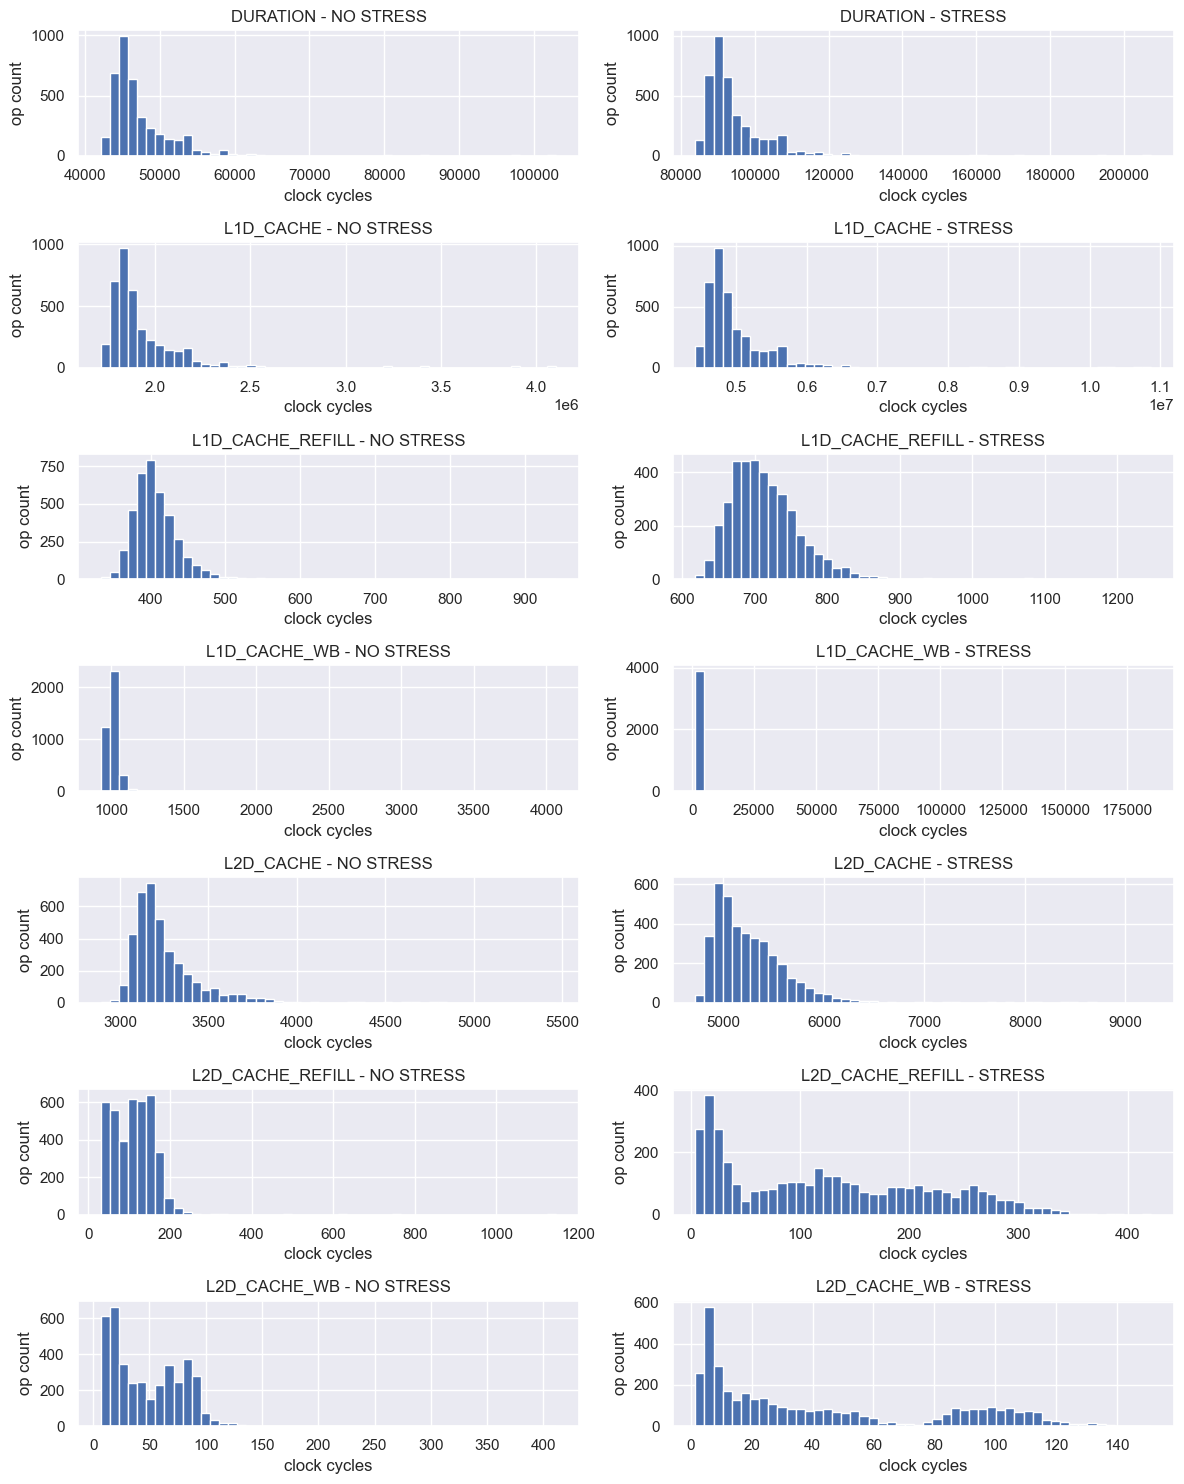

In [6]:
fig, axs = plt.subplots(7, 2, figsize=(12, 15))
for i, o in enumerate(['DURATION'] + METRICS_CONFIGS[metrics_config]):
    no_st_ax, st_ax = axs[i][0], axs[i][1]
    no_st_ax.set_title(f"{o} - NO STRESS")
    no_st_ax.set_xlabel("clock cycles")
    no_st_ax.set_ylabel("op count")
    st_ax.set_title(f"{o} - STRESS")
    st_ax.set_xlabel("clock cycles")
    st_ax.set_ylabel("op count")
    normal_df[o].hist(bins=50, ax=no_st_ax)
    stress_df[o].hist(bins=50, ax=st_ax)

plt.tight_layout()
plt.show()


In [7]:
# predictors = ['DURATION', 'L1D_CACHE_REFILL', 'L1D_CACHE_WB', 'L2D_CACHE_REFILL', 'L2D_CACHE_WB']
predictors = ['DURATION']

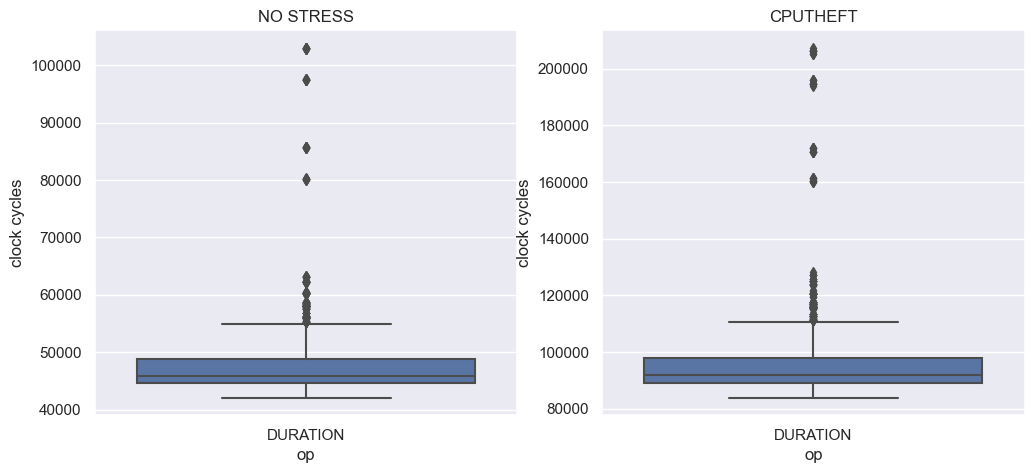

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x="variable", y="value", data=normal_df[predictors].melt(), ax=axs[0])
axs[0].set_title("NO STRESS")
axs[0].set_xlabel("op")
axs[0].set_ylabel("clock cycles")
sns.boxplot(x="variable", y="value", data=stress_df[predictors].melt(), ax=axs[1])
axs[1].set_xlabel("op")
axs[1].set_ylabel("clock cycles")
axs[1].set_title(ANOMALY_NAME)
plt.show()


In [9]:
def drop_quantile(df, q=0.1):
    cols = predictors  # one or more

    Q1 = df[cols].quantile(q)
    Q3 = df[cols].quantile(1 - q)
    IQR = Q3 - Q1

    df = df[
        ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
    ]
    return df


In [10]:
normal_df = drop_quantile(normal_df)
stress_df = drop_quantile(stress_df)
merged = pd.concat([normal_df, stress_df])
model = KMeans(n_clusters=2)
model.fit(merged[predictors])


/Users/vdecaro/miniconda3/envs/avl/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [14]:
# Depending on what cluster represents NOSTRESS and what cluster represents CPUTHEFT,
# we need to swap the labels.
labels = {"NOSTRESS": 1, ANOMALY_NAME: 0}


def test_fn(test_df, model):
    results = model.predict(test_df[predictors])
    y_true = test_df["CONTEXT"].to_numpy()
    y_true = [labels[y] for y in y_true]
    y_pred = results
    print(
        "Accuracy in regime prediction:",
        f"{round(accuracy_score(y_true, y_pred) * 100, 2)}%",
    )


In [15]:
test_fn(merged, model)

Accuracy in regime prediction: 100.0%


# Test xVTx.xx: intermittent anomaly

In [16]:
test_df, _ = load_trace(anomaly, "xVTx.xx", metrics_config)


In [17]:
test_df

,TIMESTAMP,DURATION,PROBE,KIND,LAYER,CORE,PAIR_ON,PID,L1D_CACHE,L1D_CACHE_REFILL,L1D_CACHE_WB,L2D_CACHE,L2D_CACHE_REFILL,L2D_CACHE_WB,LMC0,CONTEXT
0,5043786609,86966.807692,SENS_C1,INTERVAL,PROBE,1,63,0x000007fb,4.576565e+06,602.346154,1234.538462,4510.961538,81.038462,90.807692,0,CPUTHEFT
1,5046053568,88295.153846,SENS_C1,INTERVAL,PROBE,1,63,0x000007fb,4.659834e+06,601.000000,1236.769231,4479.961538,111.115385,25.423077,0,CPUTHEFT
2,5048355055,88456.076923,SENS_C1,INTERVAL,PROBE,1,63,0x000007fb,4.665474e+06,664.884615,1333.576923,4904.153846,92.538462,27.807692,0,CPUTHEFT
3,5050660541,88626.076923,SENS_C1,INTERVAL,PROBE,1,63,0x000007fb,4.668767e+06,671.923077,1342.423077,4930.692308,101.769231,23.653846,0,CPUTHEFT
4,5053003048,88753.115385,SENS_C1,INTERVAL,PROBE,1,63,0x000007fb,4.673977e+06,712.269231,1362.076923,5059.115385,230.346154,94.807692,0,CPUTHEFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,13026802171,100853.884615,SENS_C1,INTERVAL,PROBE,1,63,0x0000089d,5.312492e+06,686.807692,1347.346154,5318.000000,11.769231,4.076923,0,CPUTHEFT
3886,13029428834,99005.576923,SENS_C1,INTERVAL,PROBE,1,63,0x0000089d,5.206413e+06,750.307692,1418.153846,5656.307692,29.076923,7.769231,0,CPUTHEFT
3887,13032007321,98364.384615,SENS_C1,INTERVAL,PROBE,1,63,0x0000089d,5.182815e+06,690.076923,1358.576923,5264.153846,17.884615,5.615385,0,CPUTHEFT
3888,13034601466,96572.961538,SENS_C1,INTERVAL,PROBE,1,63,0x0000089d,5.080850e+06,690.076923,1352.115385,5183.269231,18.038462,6.153846,0,CPUTHEFT


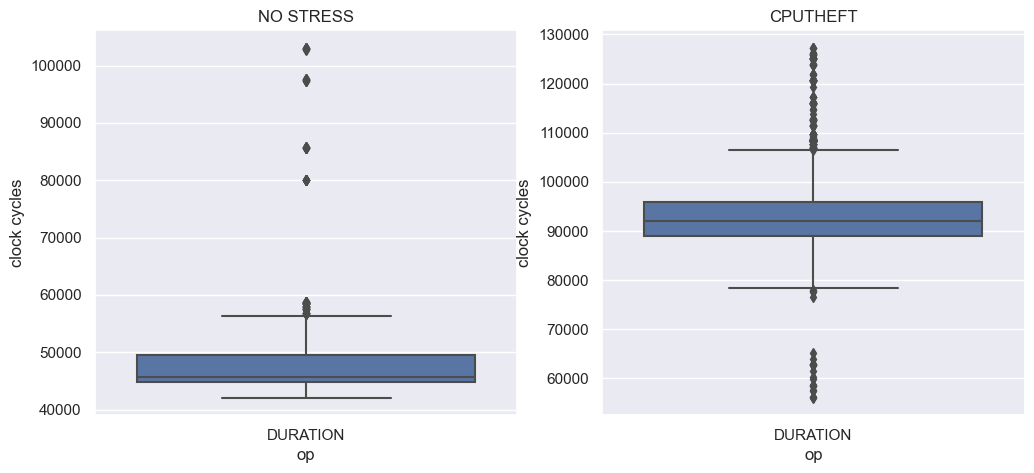

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
normal_df = test_df[test_df["CONTEXT"] == "NOSTRESS"]
stress_df = test_df[test_df["CONTEXT"] == ANOMALY_NAME]
sns.boxplot(x="variable", y="value", data=normal_df[predictors].melt(), ax=axs[0])
axs[0].set_title("NO STRESS")
axs[0].set_xlabel("op")
axs[0].set_ylabel("clock cycles")
sns.boxplot(x="variable", y="value", data=stress_df[predictors].melt(), ax=axs[1])
axs[1].set_xlabel("op")
axs[1].set_ylabel("clock cycles")
axs[1].set_title(ANOMALY_NAME)
plt.show()


In [19]:
test_fn(test_df, model)

Accuracy in regime prediction: 98.46%


In [28]:
import pickle

with open(f'models/{anomaly}.pkl', 'wb+') as f:
    pickle.dump({'headers': predictors, 'model': model}, f)